In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#**`problem statement`**


---


We can predict the level of air pollution (e.g., AQI, PM2.5, or other pollutants) in a given city and date, using historical air quality data and potentially other relevant factors like weather conditions or seasonality.







**`Objective`**

---
The objective of this EDA project is to **analyze and interpret air quality data across different cities and time periods** to uncover trends, patterns, and insights. Specifically, the project aims to:

1. **Understand Pollution Levels**: Identify key pollutants and their contribution to air quality degradation.
2. **City-Wise Comparison**: Compare air quality indices and pollutant levels across cities to determine the most and least polluted regions.
3. **Temporal Patterns**: Explore temporal trends (daily, monthly, or yearly) in pollution levels and AQI to identify seasonal effects or long-term trends.
4. **Data Completeness and Quality**: Investigate missing data, outliers, and inconsistencies, and apply suitable imputation or cleaning methods.
5. **Insights for Policy**: Generate actionable insights to assist policymakers and stakeholders in implementing effective air quality management strategies.

In [ ]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


#`description`

---



`City`: The name of the city where the air quality measurements were taken.

`Date`: The date of the air quality measurement.

`PM2.5`: The concentration of particulate matter with a diameter of 2.5 micrometers or less, a major air pollutant.

`PM10`: The concentration of particulate matter with a diameter of 10 micrometers or less.

`NO`: The concentration of nitrogen monoxide, a gas that contributes to air pollution.

`NO2`: The concentration of nitrogen dioxide, a harmful gas formed when NO reacts with oxygen.

`NOx`: The concentration of nitrogen oxides (NO + NO2).

`NH3`: The concentration of ammonia, a gas that can react with other pollutants to form harmful particles.

`CO`: The concentration of carbon monoxide, a toxic gas.

`SO2`: The concentration of sulfur dioxide, a gas that contributes to acid rain and respiratory problems.

`O3`: The concentration of ozone, a gas that can be harmful at ground level.

`Benzene`: The concentration of benzene, a volatile organic compound linked to health problems.

`Toluene`: The concentration of toluene, another volatile organic compound.

`Xylene`: The concentration of xylene, a group of volatile organic compounds.

`AQI`: The Air Quality Index, a measure of how polluted the air is.

`AQI_Bucket`: A categorical representation of the AQI, grouping it into ranges like "Good," "Moderate," "Poor," "Very Poor," or "Severe."

#understand data

In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
df.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


#visualization


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

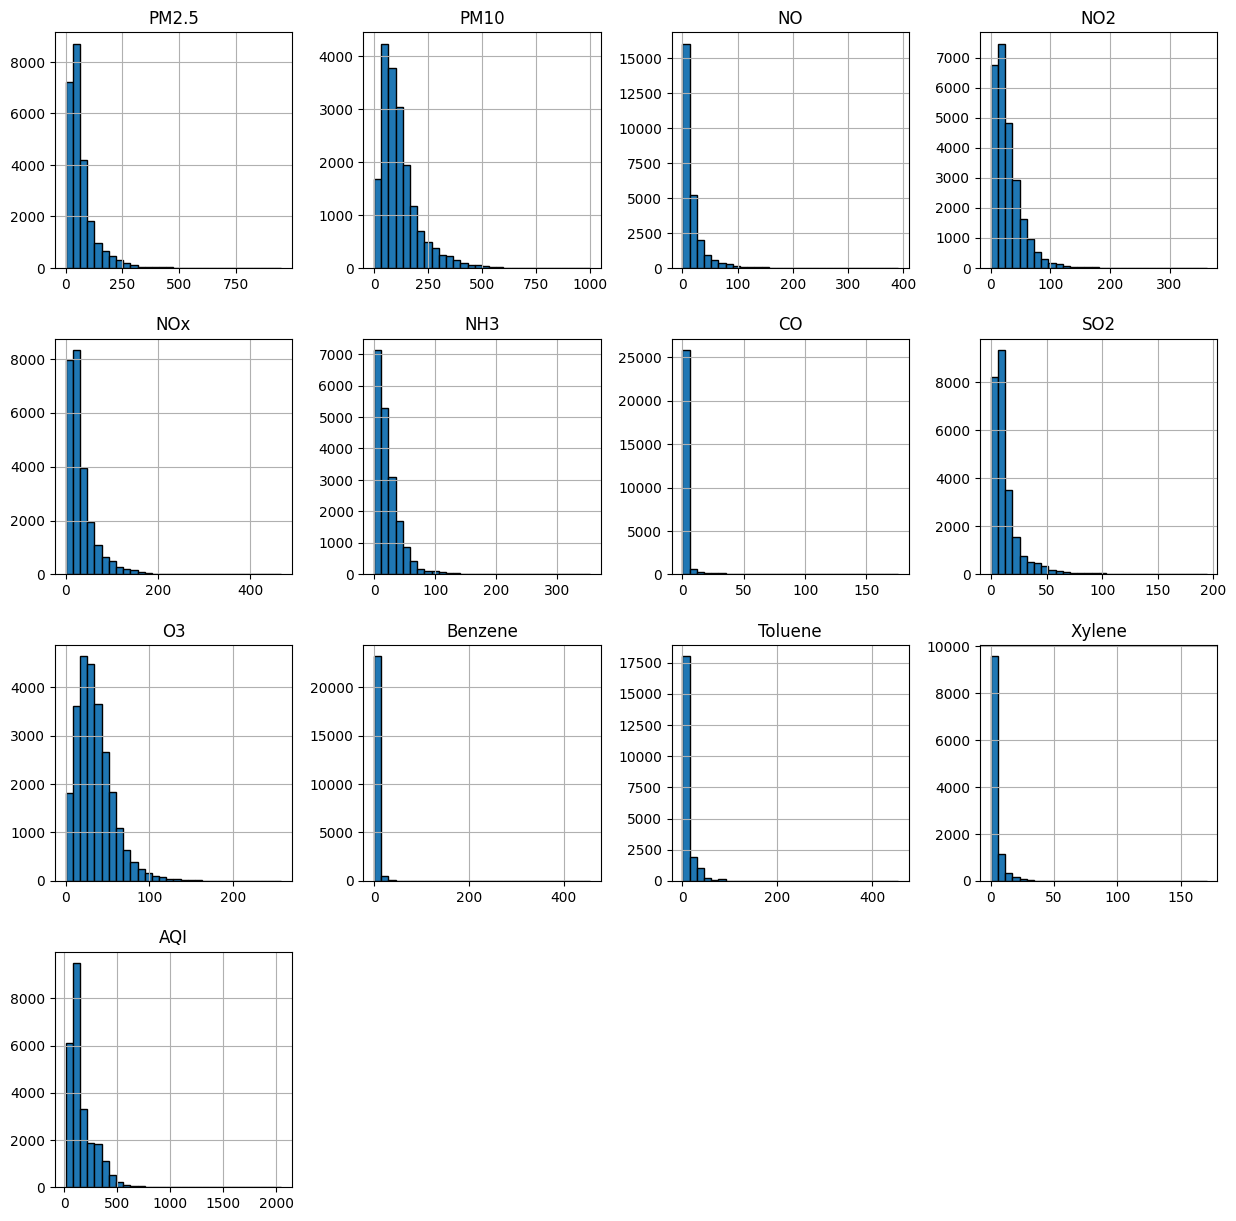

In [ ]:
df.hist(figsize=(15,15),bins=30, edgecolor='k')

#data cleaning

feature engineering

date to day,month,year

In [ ]:
df.duplicated().sum() #checking for duplicates

0

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [ ]:
df.drop('Date',axis=1,inplace=True) #dropping date after feature engineering
df.drop('Xylene',axis=1,inplace=True) # have more null values
df.drop('AQI_Bucket',axis=1,inplace=True) # this feature is not needed for regression it is classification

In [ ]:
# fill the missing values

df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())
df['PM10'] = df['PM10'].fillna(df['PM10'].median())
df['NO'] = df['NO'].fillna(df['NO'].median())
df['NO2'] = df['NO2'].fillna(df['NO2'].median())
df['NOx'] = df['NOx'].fillna(df['NOx'].median())
df['NH3'] = df['NH3'].fillna(df['NH3'].median())
df['CO'] = df['CO'].fillna(df['CO'].median())
df['SO2'] = df['SO2'].fillna(df['SO2'].median())
df['O3'] = df['O3'].fillna(df['O3'].median())
df['Benzene'] = df['Benzene'].fillna(df['Benzene'].median())
df['Toluene'] = df['Toluene'].fillna(df['Toluene'].median())
df['AQI'] = df['AQI'].fillna(df['AQI'].median())

In [ ]:
print(df.isnull().sum())

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
day        0
month      0
year       0
dtype: int64


#data visualisation


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'AQI'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

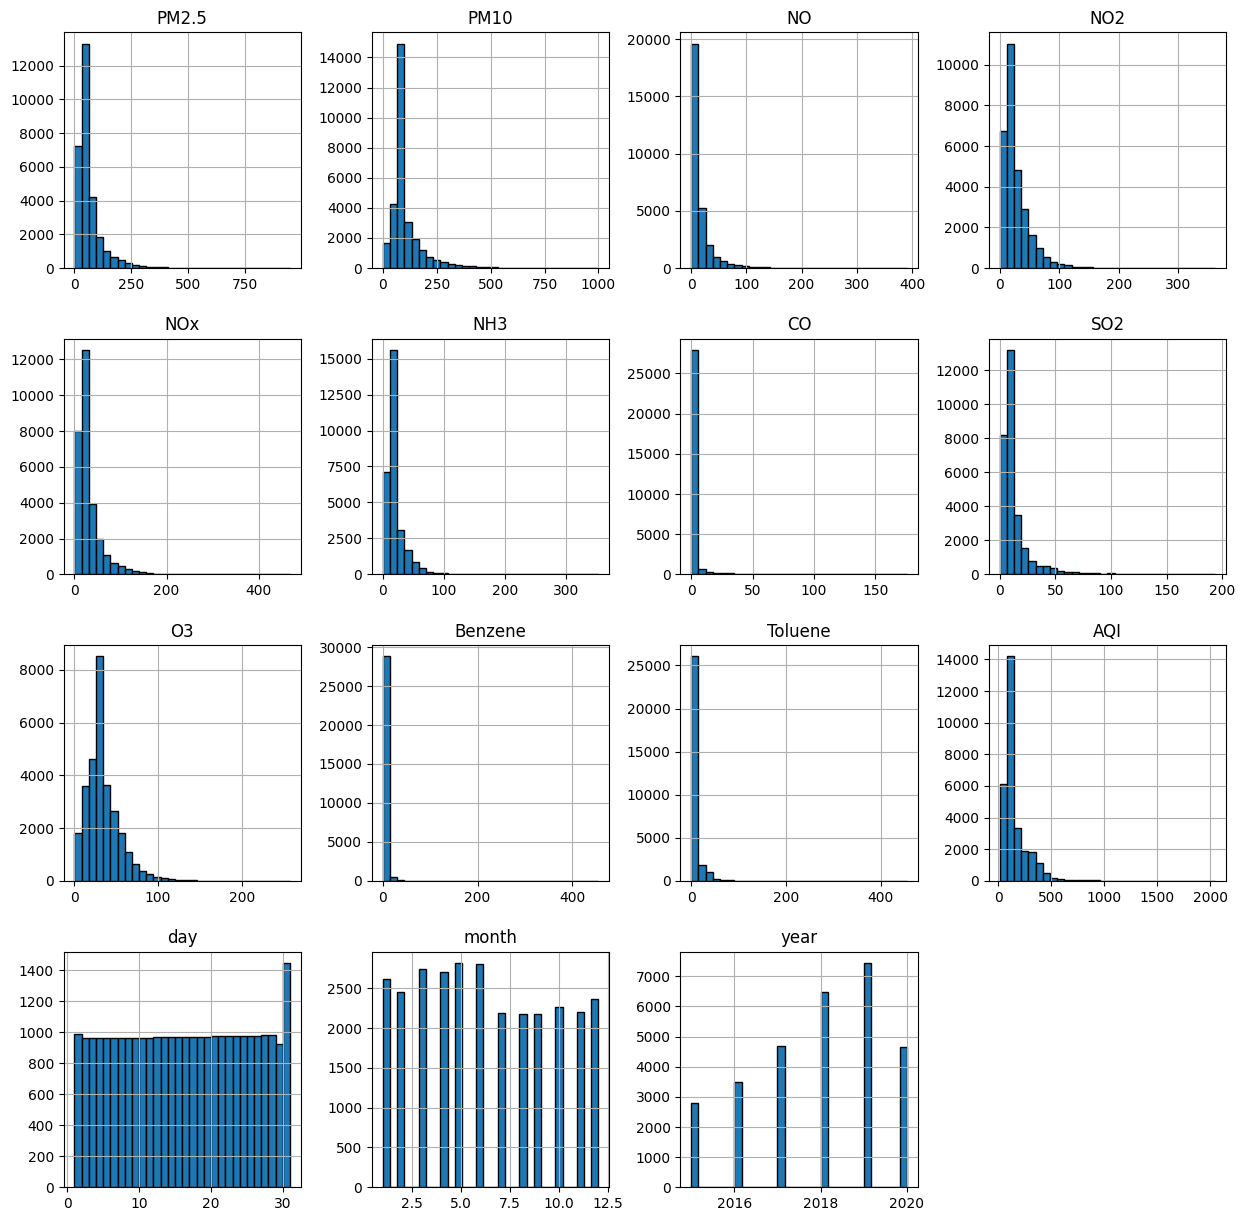

In [ ]:
df.hist(figsize=(15,15),bins=30, edgecolor='k')

<Axes: >

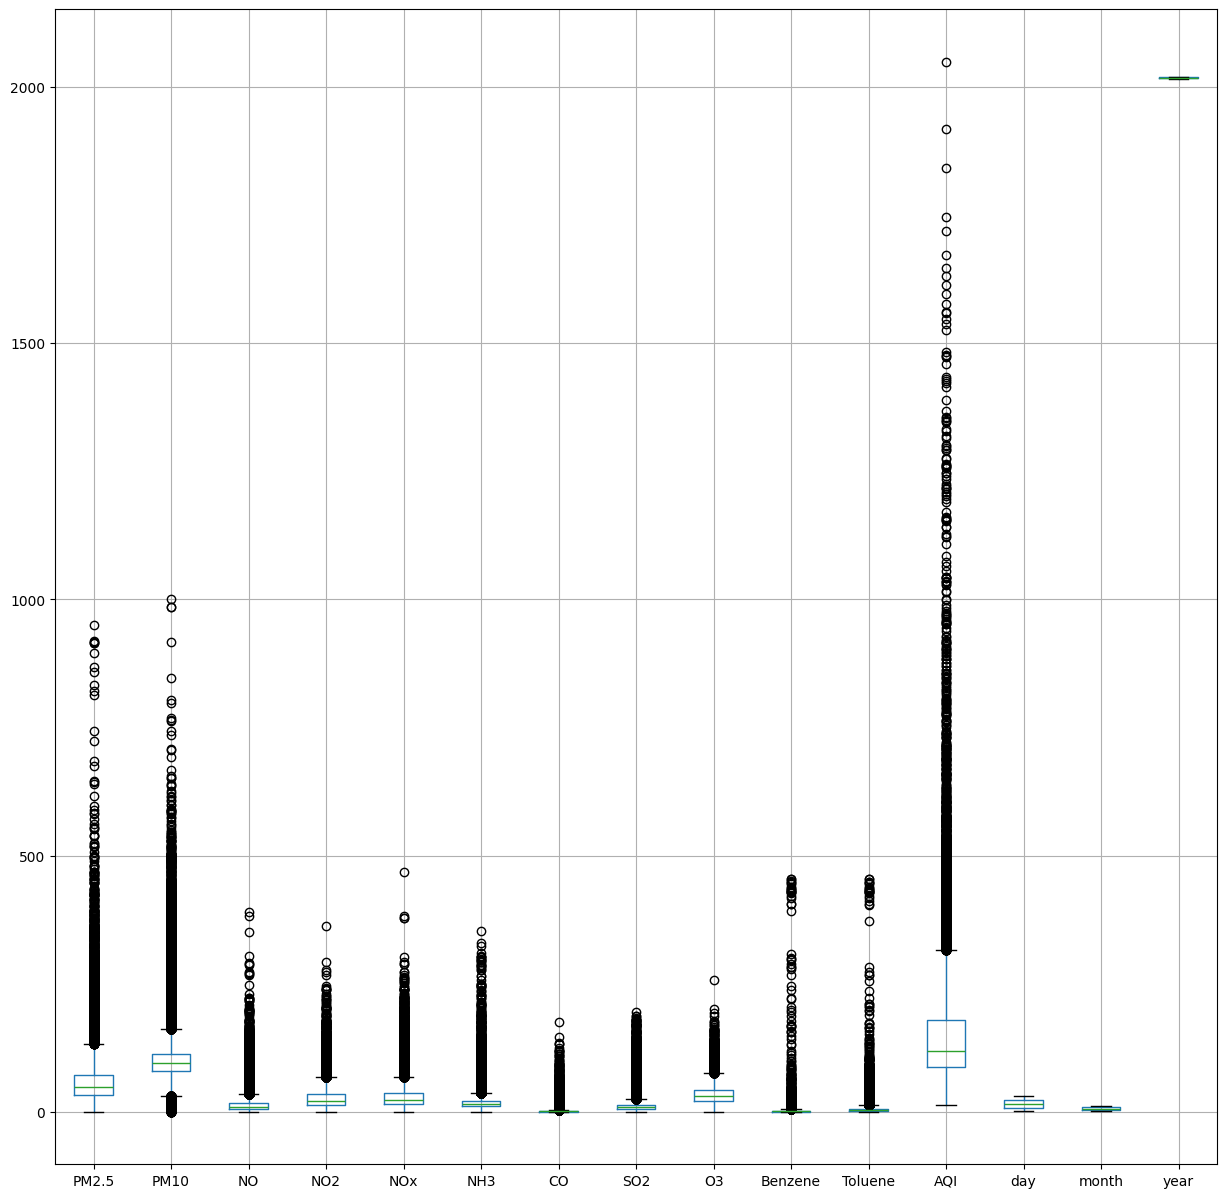

In [ ]:
df.boxplot(figsize=(15,15))


# label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

le=LabelEncoder()
df['City']=le.fit_transform(df['City'])

#correlation matrix


<Axes: >

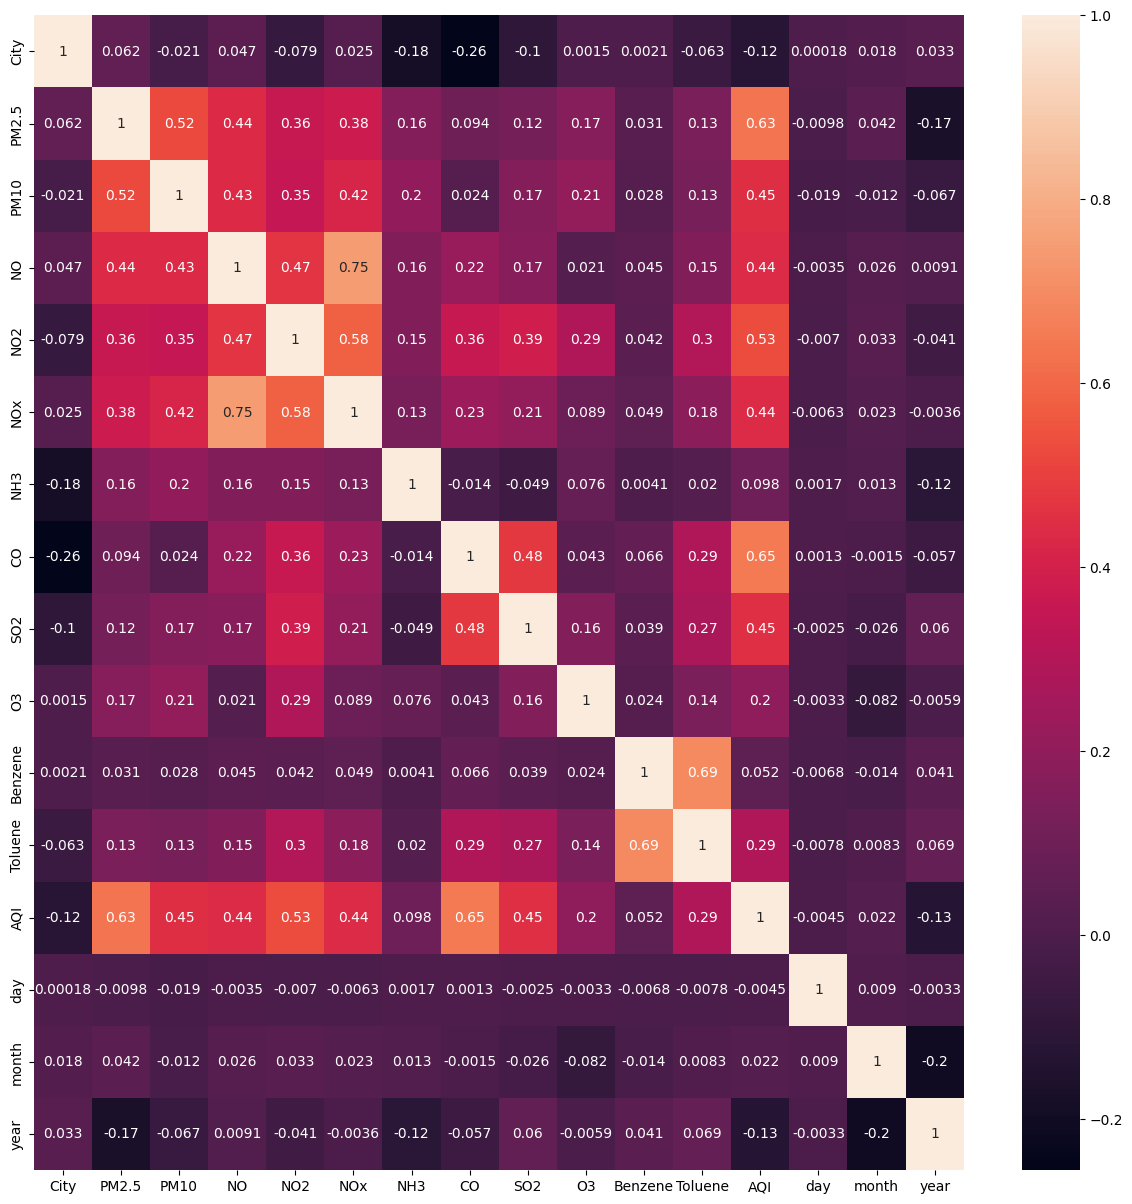

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)


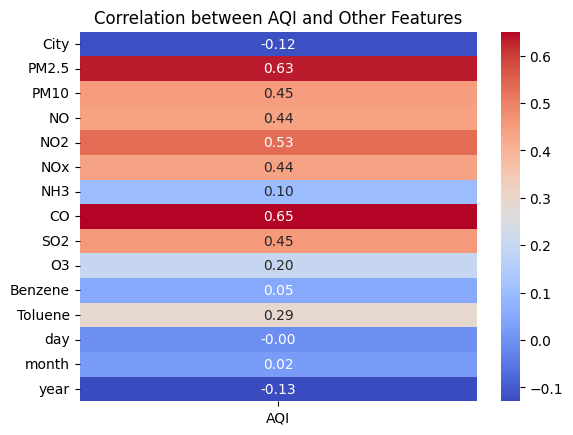

In [ ]:
# Calculate the correlation between 'AQI' and all other columns
corr = df.corr()['AQI']

# Remove the correlation of 'AQI' with itself (which is always 1)
corr =corr.drop('AQI')

# Create a heatmap to visualize the correlations
sns.heatmap(corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})  # to_frame() converts Series to DataFrame for heatmap
plt.title('Correlation between AQI and Other Features')
plt.show()

In [ ]:
s=df.corr()['AQI']
s.sort_values(ascending=False)

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
O3,0.199100


In [ ]:
df1=df[['PM2.5','NOx','CO','PM10','SO2','AQI']]
df1

,PM2.5,NOx,CO,PM10,SO2,AQI
0,48.57,17.15,0.92,95.68,27.64,118.0
1,48.57,16.46,0.97,95.68,24.55,118.0
2,48.57,29.70,17.40,95.68,29.07,118.0
3,48.57,17.97,1.70,95.68,18.59,118.0
4,48.57,37.76,22.10,95.68,39.33,118.0
...,...,...,...,...,...,...
29526,15.02,19.54,0.47,50.94,8.55,41.0
29527,24.38,16.53,0.52,74.09,12.72,70.0
29528,22.91,18.33,0.48,65.73,8.42,68.0
29529,16.64,18.80,0.52,49.97,9.84,54.0


#skewness

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'NOx'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'AQI'}>]],
      dtype=object)

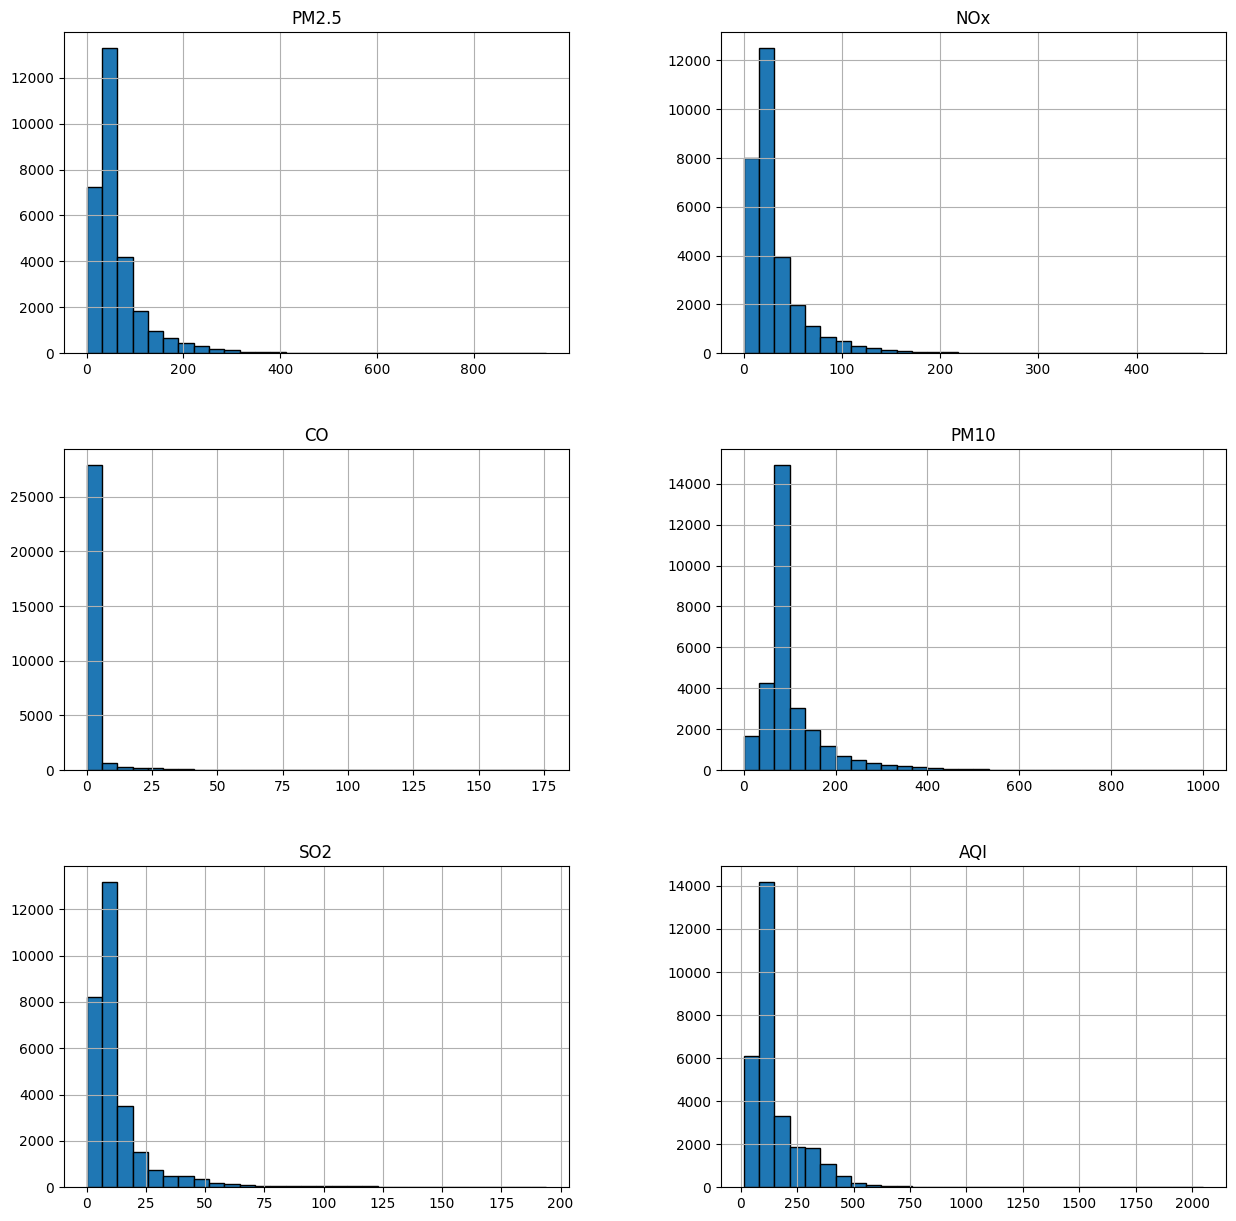

In [ ]:
df1.hist(figsize=(15,15),bins=30, edgecolor='k')

In [ ]:
df1['PM2.5'] = np.log1p(df1['PM2.5'])
df1['NOx'] = np.log1p(df1['NOx'])
df1['CO'] = np.log1p(df1['CO'])
df1['PM10'] = np.log1p(df1['PM10'])
df1['SO2'] = np.log1p(df1['SO2'])
df1['AQI'] = np.log1p(df1['AQI']) #target variable

<ipython-input-129-a4adc24e687d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PM2.5'] = np.log1p(df1['PM2.5'])
<ipython-input-129-a4adc24e687d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NOx'] = np.log1p(df1['NOx'])
<ipython-input-129-a4adc24e687d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'NOx'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'AQI'}>]],
      dtype=object)

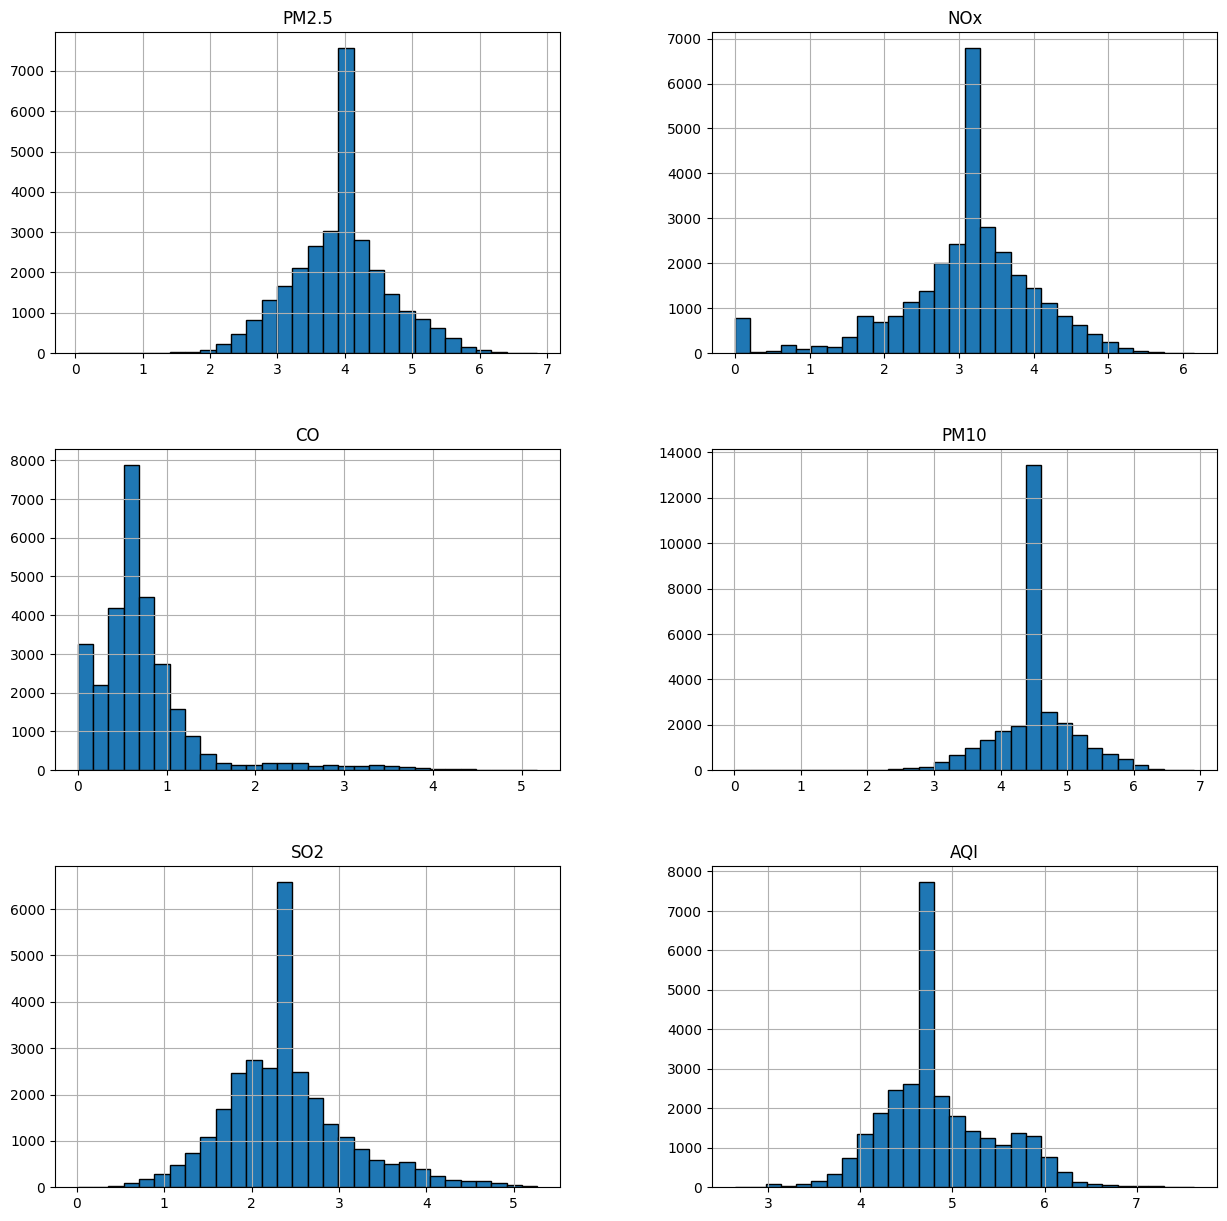

In [ ]:
df1.hist(figsize=(15,15),bins=30, edgecolor='k')

#modeling

In [ ]:
from sklearn.model_selection import train_test_split

x=df1[['PM2.5','NOx','CO','PM10','SO2']]
y=df['AQI']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mean squared error:',mse)
print('r2 score:',r2)

mean squared error: 5117.913775442587
r2 score: 0.667548398782609


#outlier


In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df1, exclude_column):
    for col in df1.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    return df1

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df1, exclude_column='AQI')
df_cleaned

,PM2.5,NOx,CO,PM10,SO2,AQI
0,3.903386,2.898671,0.652325,4.571407,3.354804,4.779123
1,3.903386,2.859913,0.678034,4.571407,3.240637,4.779123
3,3.903386,2.942859,0.993252,4.571407,2.975019,4.779123
14,3.903386,2.867899,0.470004,4.571407,3.397524,4.779123
34,4.402442,3.218876,1.214913,4.571407,3.285787,5.686975
...,...,...,...,...,...,...
29526,2.773838,3.022374,0.385262,3.950089,2.256541,3.737670
29527,3.233961,2.863914,0.418710,4.318687,2.618855,4.262680
29528,3.174297,2.961658,0.392042,4.200655,2.242835,4.234107
29529,2.870169,2.985682,0.418710,3.931237,2.383243,4.007333


In [ ]:
df1=df_cleaned

In [ ]:
x=df1[['PM2.5','NOx','CO','PM10','SO2']]
y=df1['AQI']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mean squared error:',mse)
print('r2 score:',r2)

mean squared error: 0.053922034805148754
r2 score: 0.7080914279999206


#scaled

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is called 'df1'
# Select the features you want to scale
features = ['PM2.5','NOx','CO','PM10','SO2']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df1[features])

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df1.index)

In [ ]:
df2=scaled_df

In [ ]:
x=df2[['PM2.5','NOx','CO','PM10','SO2']]
y=df1['AQI']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mean squared error:',mse)
print('r2 score:',r2)

mean squared error: 0.05392203480514877
r2 score: 0.7080914279999204
